In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as ms


#### About the data

The dataset for this competition includes aggregate stopped vehicle information and intersection wait times. Your task is to predict congestion, based on an aggregate measure of stopping distance and waiting times, at intersections in 4 major US cities: Atlanta, Boston, Chicago & Philadelphia.

Key Take Aways

Exploratory Data Analysis

Extensive Modelling

In [93]:
train = pd.read_csv('traffic/train.csv')

In [94]:
test = pd.read_csv('traffic/test.csv')

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856387 entries, 0 to 856386
Data columns (total 28 columns):
RowId                      856387 non-null int64
IntersectionId             856387 non-null int64
Latitude                   856387 non-null float64
Longitude                  856387 non-null float64
EntryStreetName            848239 non-null object
ExitStreetName             850100 non-null object
EntryHeading               856387 non-null object
ExitHeading                856387 non-null object
Hour                       856387 non-null int64
Weekend                    856387 non-null int64
Month                      856387 non-null int64
Path                       856387 non-null object
TotalTimeStopped_p20       856387 non-null float64
TotalTimeStopped_p40       856387 non-null float64
TotalTimeStopped_p50       856387 non-null float64
TotalTimeStopped_p60       856387 non-null float64
TotalTimeStopped_p80       856387 non-null float64
TimeFromFirstStop_p20      856387 non

In [96]:
train.sample(5)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
6650,1928007,8,33.810408,-84.438777,Marietta Boulevard Northwest,Marietta Boulevard Northwest,N,N,8,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
470488,2391845,24,40.003726,-75.169032,Fox Street,Fox Street,NW,NW,7,0,...,31.0,37.0,40.0,71.0,0.0,97.4,111.2,124.7,307.7,Philadelphia
768732,2690089,1529,39.999347,-75.122869,East Westmoreland Street,C Street,W,S,15,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
780377,2701734,1588,39.947792,-75.229456,Baltimore Avenue,Baltimore Avenue,E,E,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
17362,1938719,50,33.736843,-84.387872,Capitol Avenue Southeast,Hank Aaron Drive Southeast,S,S,0,1,...,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,627.9,Atlanta


In [97]:
#### Descrribing the data
train.describe()

,RowId,IntersectionId,Latitude,Longitude,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,...,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80
count,8.563870e+05,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,...,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.00000,856387.000000
mean,2.349550e+06,833.283384,39.618965,-77.916488,12.431234,0.277880,9.104808,1.755596,5.403592,7.722655,...,3.181096,9.162174,12.722165,18.926085,34.201656,6.765856,20.285128,28.837113,44.27231,83.991313
std,2.472178e+05,654.308913,2.935437,5.952959,6.071843,0.447954,1.991094,7.146549,12.981674,15.685910,...,11.835994,20.446568,24.219271,29.851797,41.130668,29.535968,59.202108,75.217343,102.03225,160.709797
min,1.921357e+06,0.000000,33.649973,-87.862288,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.135454e+06,291.000000,39.936739,-84.387607,8.000000,0.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.349550e+06,679.000000,39.982974,-75.175055,13.000000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.00000,60.400000
75%,2.563646e+06,1264.000000,41.910047,-75.100495,17.000000,1.000000,11.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,22.000000,31.000000,49.000000,0.000000,0.000000,53.100000,64.20000,85.950000
max,2.777743e+06,2875.000000,42.381782,-71.025550,23.000000,1.000000,12.000000,298.000000,375.000000,375.000000,...,337.000000,356.000000,356.000000,357.000000,359.000000,1901.900000,2844.400000,2851.100000,3282.40000,4079.200000


In [98]:
### Checking the missing values
train.isna().sum()

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64

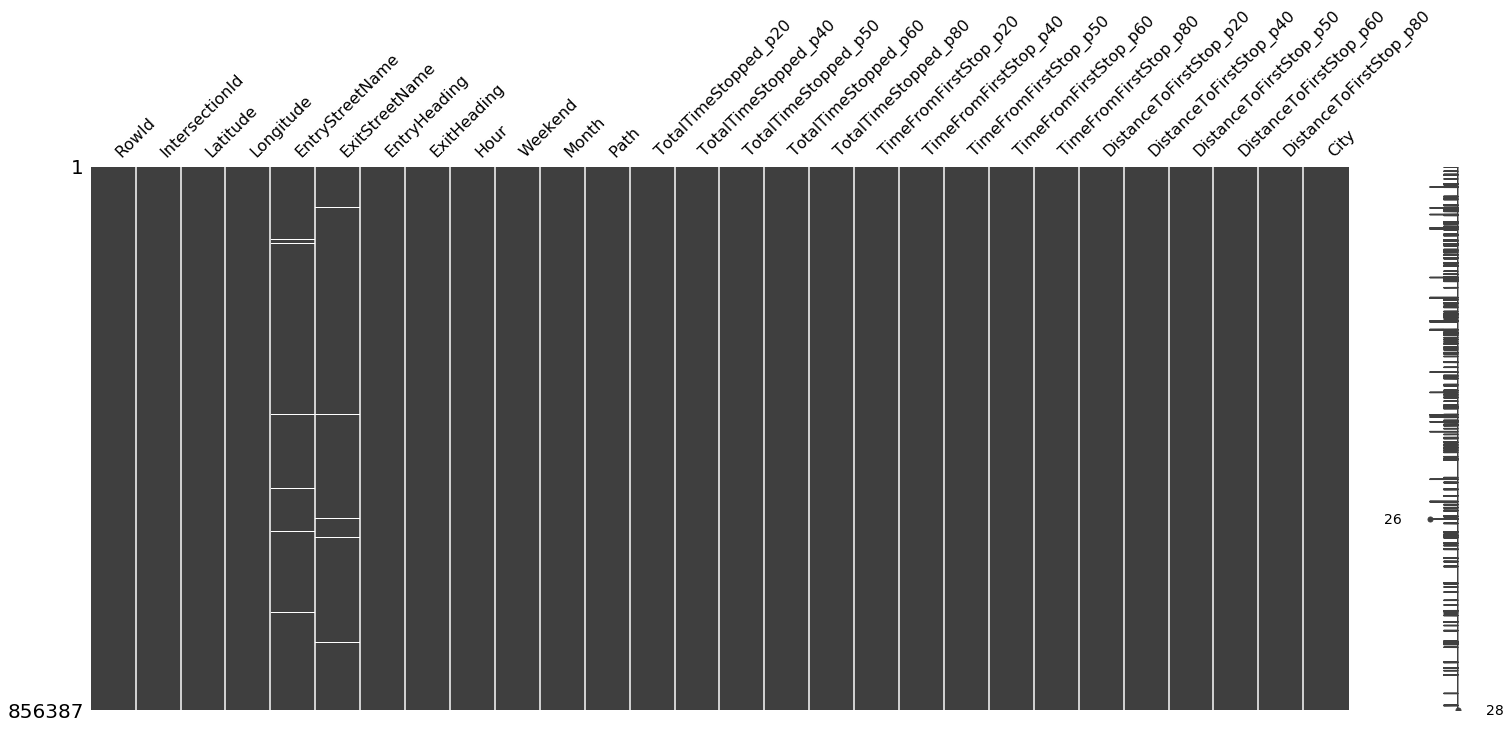

In [99]:
### visualizing the missing data using the Missingno function
ms.matrix(train)

 Since the missing values are With columns names EntryStreetName  and Exitstreetname. Hence there is no use with names in predicting the target values Hence we will be drop both the columns 

In [100]:
# Droping the missing columns
train = train.dropna()

In [101]:
test = test.dropna()

### Let's start getting insights

Finding the nature of the data in city wise

In [102]:
cities= (train.City.unique())
cities


array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

In [103]:
Atlanta = train[train['City']=='Atlanta']
Boston = train[train['City'] == 'Boston']
Chicago = train[train['City'] == 'Chicago']
Philadelphia = train[train['City'] == 'Philadelphia']


In [104]:
Time_wasted_col = ['TotalTimeStopped_p20','TotalTimeStopped_p40','TotalTimeStopped_p50', 'TotalTimeStopped_p60','TotalTimeStopped_p80']

In [105]:
Atlanta['TotalTimeWasted'] = Atlanta.TotalTimeStopped_p20 +Atlanta.TotalTimeStopped_p40 + Atlanta.TotalTimeStopped_p50+Atlanta.TotalTimeStopped_p60+Atlanta.TotalTimeStopped_p80

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
Boston['TotalTimeWasted'] = Boston.TotalTimeStopped_p20 +Boston.TotalTimeStopped_p40 + Boston.TotalTimeStopped_p50+Boston.TotalTimeStopped_p60+Boston.TotalTimeStopped_p80

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
Chicago['TotalTimeWasted'] =Chicago.TotalTimeStopped_p20 +Chicago.TotalTimeStopped_p40 + Chicago.TotalTimeStopped_p50+Chicago.TotalTimeStopped_p60+Chicago.TotalTimeStopped_p80
Philadelphia['TotalTimeWasted'] =Philadelphia.TotalTimeStopped_p20 +Philadelphia.TotalTimeStopped_p40 + Philadelphia.TotalTimeStopped_p50+Philadelphia.TotalTimeStopped_p60+Philadelphia.TotalTimeStopped_p80

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
Atlanta

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,TotalTimeWasted
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156479,2077836,520,33.757096,-84.382228,Piedmont Avenue Northeast,Piedmont Avenue Northeast,N,N,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0
156480,2077837,520,33.757096,-84.382228,Piedmont Avenue Northeast,Piedmont Avenue Northeast,N,N,1,1,...,0.0,25.0,29.0,0.0,0.0,0.0,57.8,68.7,Atlanta,37.0
156481,2077838,520,33.757096,-84.382228,Piedmont Avenue Northeast,Piedmont Avenue Northeast,N,N,14,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0
156482,2077839,520,33.757096,-84.382228,Piedmont Avenue Northeast,Piedmont Avenue Northeast,N,N,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0


### Visualization of the Higest traffic starting street   in the respective cities as shown below

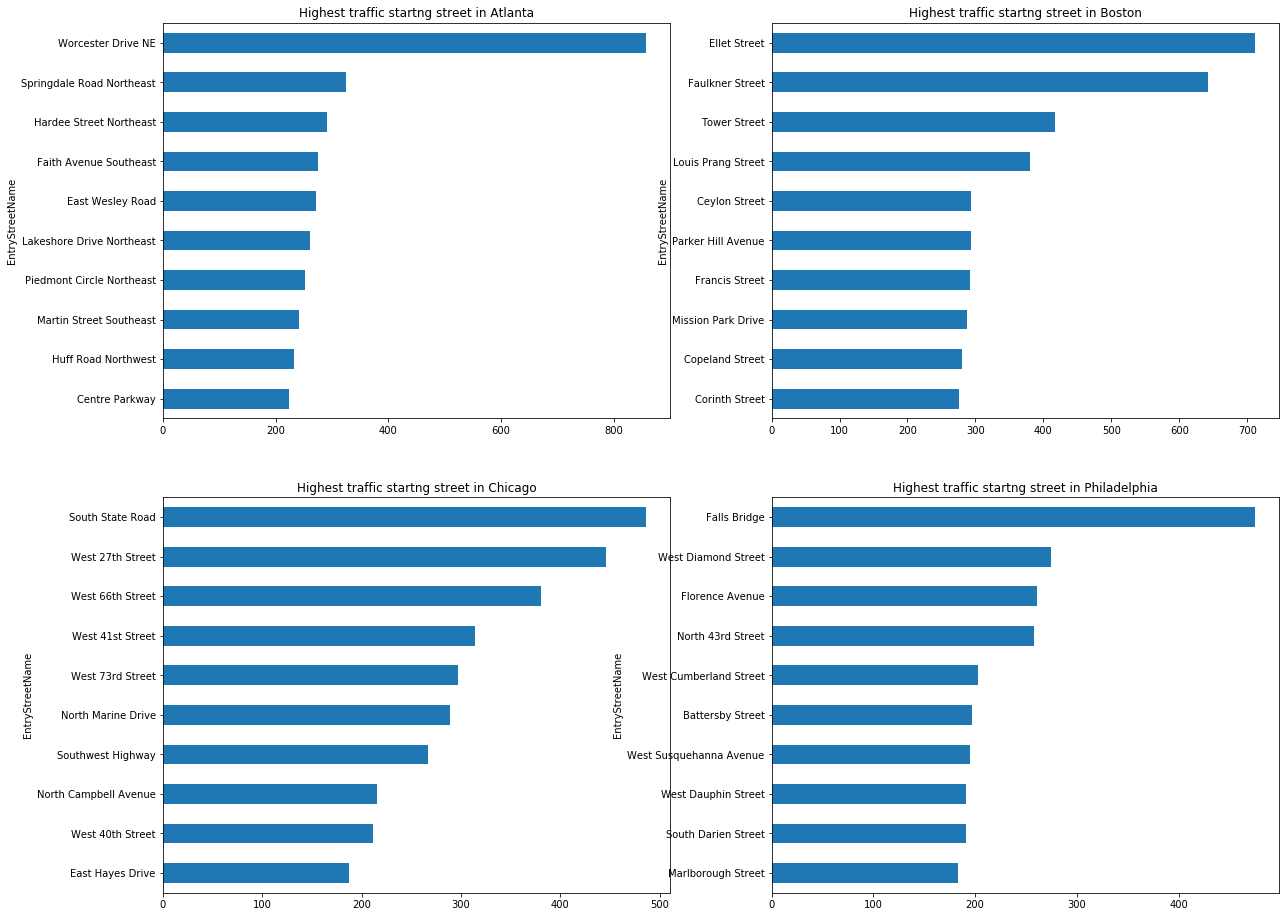

<Figure size 1440x1152 with 0 Axes>

In [109]:
fig, axes = plt.subplots(ncols= 2, nrows= 2)
fig = plt.figure(figsize=(20,16))
temp_1 = Atlanta.groupby('EntryStreetName').TotalTimeWasted.mean().sort_values().tail(10)
temp_1.plot(kind = 'barh', ax = axes[0,0], figsize = (20,16), title ='Highest traffic startng street in Atlanta'  )

temp_2 = Boston.groupby('EntryStreetName').TotalTimeWasted.mean().sort_values().tail(10)
temp_2.plot(kind = 'barh', ax = axes [0,1], figsize = (20,16), title ='Highest traffic startng street in Boston' )
 
temp_3 = Chicago.groupby('EntryStreetName').TotalTimeWasted.mean().sort_values().tail(10)
temp_3.plot(kind = 'barh', ax = axes[1,0], figsize = (20,16), title = 'Highest traffic startng street in Chicago')

temp_4 = Philadelphia.groupby('EntryStreetName').TotalTimeWasted.mean().sort_values().tail(10)
temp_4.plot(kind = 'barh', ax = axes[1,1], figsize = (20,16), title = 'Highest traffic startng street in Philadelphia')

### Higest Traffic Ending Streets`

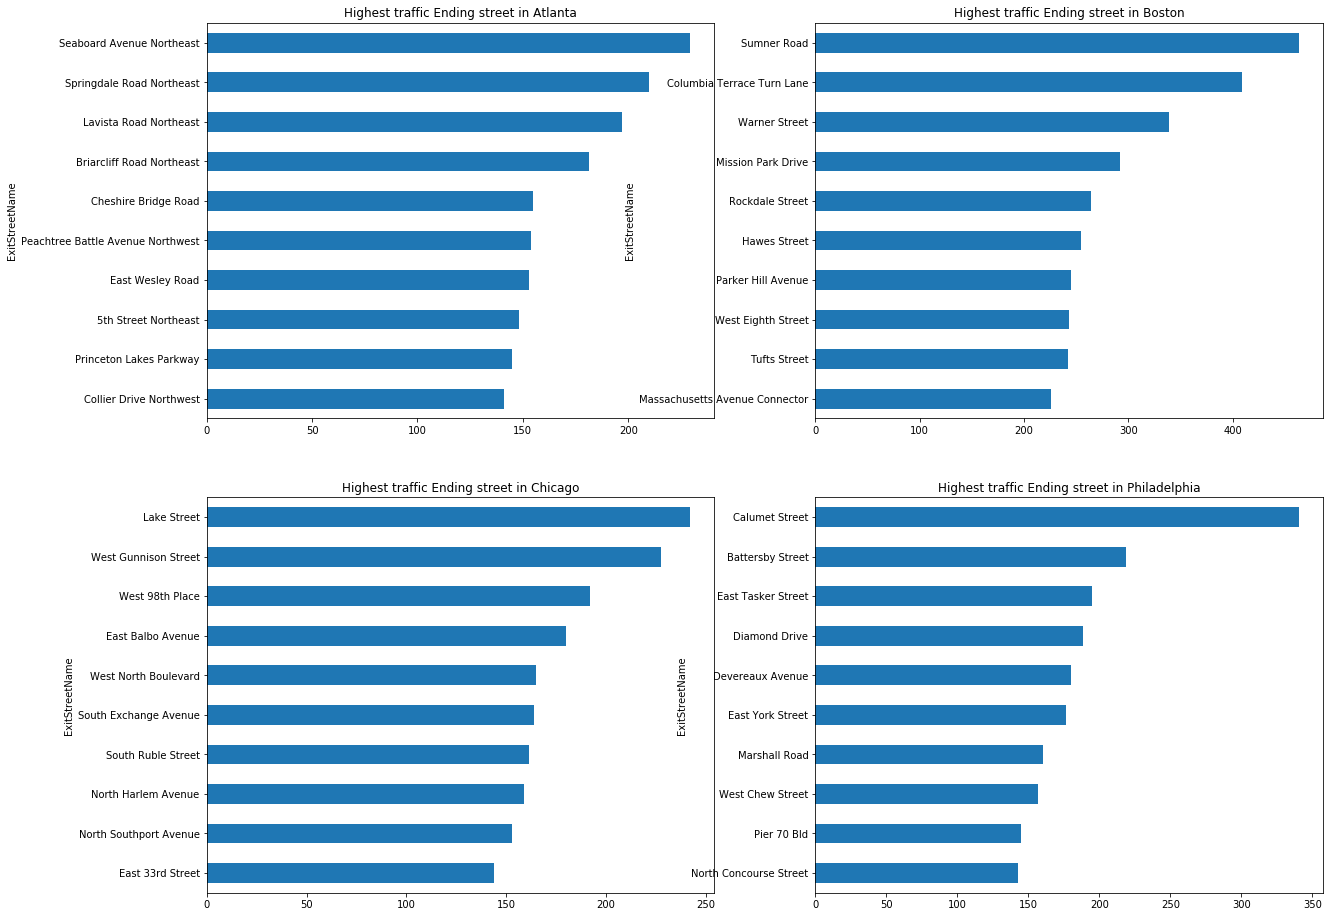

<Figure size 1440x1152 with 0 Axes>

In [110]:
fig, axes = plt.subplots(ncols= 2, nrows= 2)
fig = plt.figure(figsize=(20,16))
temp_1 = Atlanta.groupby('ExitStreetName').TotalTimeWasted.mean().sort_values().tail(10)
temp_1.plot(kind = 'barh', ax = axes[0,0], figsize = (20,16), title ='Highest traffic Ending street in Atlanta'  )

temp_2 = Boston.groupby('ExitStreetName').TotalTimeWasted.mean().sort_values().tail(10)
temp_2.plot(kind = 'barh', ax = axes [0,1], figsize = (20,16), title ='Highest traffic Ending street in Boston' )
 
temp_3 = Chicago.groupby('ExitStreetName').TotalTimeWasted.mean().sort_values().tail(10)
temp_3.plot(kind = 'barh', ax = axes[1,0], figsize = (20,16), title = 'Highest traffic Ending street in Chicago')

temp_4 = Philadelphia.groupby('ExitStreetName').TotalTimeWasted.mean().sort_values().tail(10)
temp_4.plot(kind = 'barh', ax = axes[1,1], figsize = (20,16), title = 'Highest traffic Ending street in Philadelphia')

### Visualization of Traffic data with respect to Hour

### Hourly basis garph  wih respect to cities

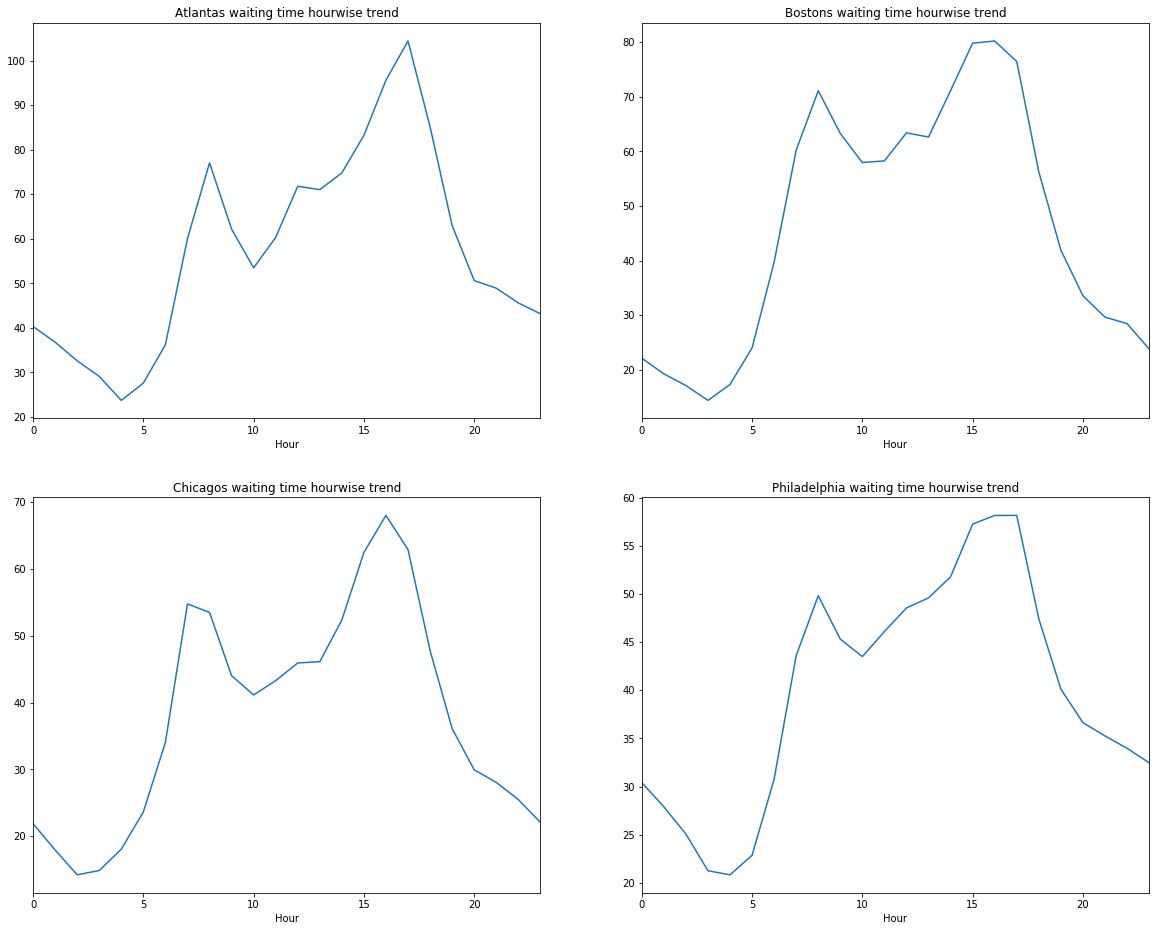

In [111]:
fig , axes = plt.subplots(ncols= 2, nrows=2)

a_hr = Atlanta.groupby('Hour').TotalTimeWasted.mean()
a_hr.plot(ax =  axes[0,0],figsize = (20,16), title = 'Atlantas waiting time hourwise trend')




b_hr = Boston.groupby('Hour').TotalTimeWasted.mean()
b_hr.plot(ax =axes[0,1],figsize = (20,16), title = 'Bostons waiting time hourwise trend')

c_hr = Chicago.groupby('Hour').TotalTimeWasted.mean()
c_hr.plot(ax = axes[1,0],figsize = (20,16), title = 'Chicagos waiting time hourwise trend')


p_hr = Philadelphia.groupby('Hour').TotalTimeWasted.mean()
p_hr.plot(ax = axes[1,1],figsize = (20,16), title = 'Philadelphia waiting time hourwise trend')


#### Visualization with respect to whole dataset on hourly basis

In [112]:
train

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856382,2777739,1990,39.938232,-75.149930,South 4th Street,Catharine Street,S,W,17,1,...,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,75.5,Philadelphia
856383,2777740,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,18,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
856384,2777741,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,19,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
856385,2777742,1990,39.938232,-75.149930,Catharine Street,Catharine Street,W,W,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia


In [113]:
train["total_time"] = train.TotalTimeStopped_p20 +train.TotalTimeStopped_p40 + train.TotalTimeStopped_p50+train.TotalTimeStopped_p60+train.TotalTimeStopped_p80

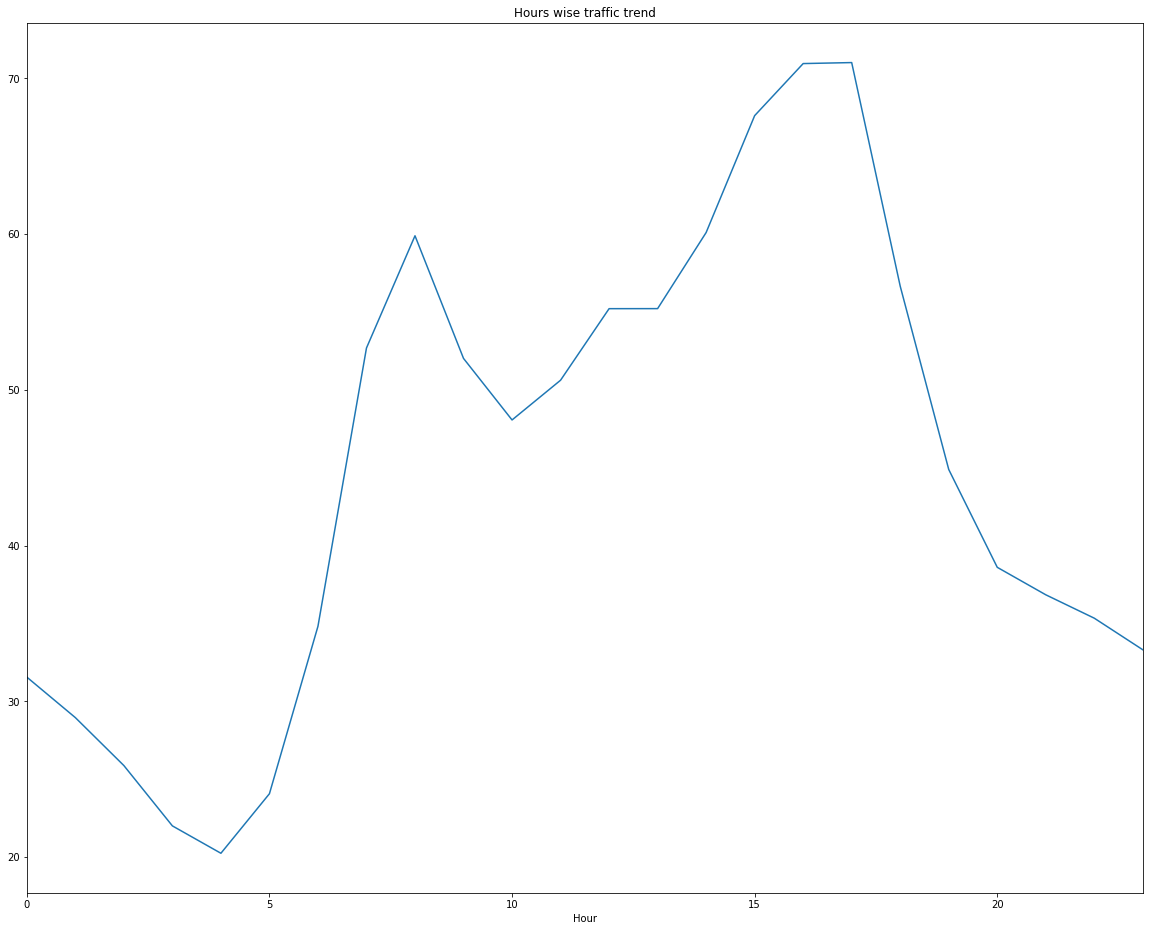

In [114]:
data_hr = train.groupby('Hour').total_time.mean()
data_hr.plot(figsize = (20, 16), title = 'Hours wise traffic trend')

In [115]:
cities


array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

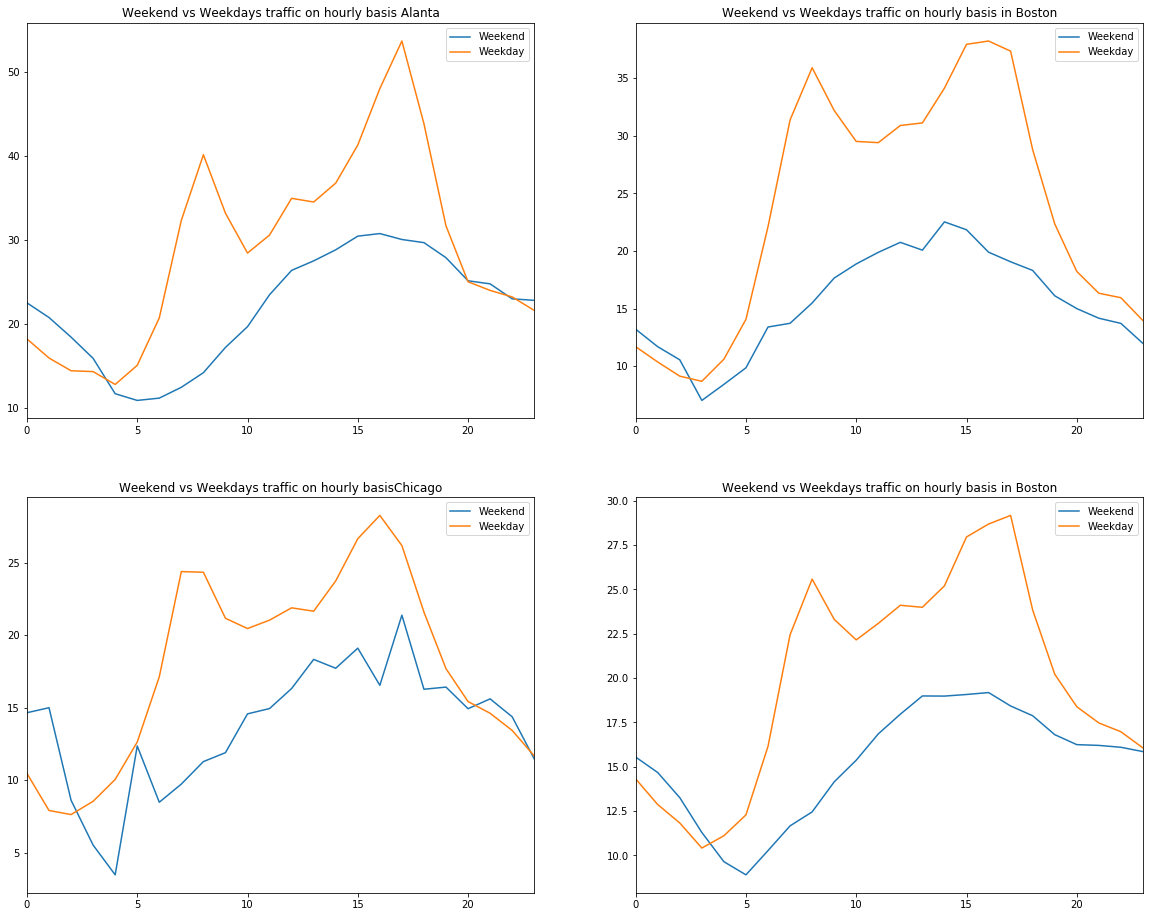

<Figure size 1440x1152 with 0 Axes>

In [116]:
fig, axes=plt.subplots(ncols=2, nrows=2)
fig = plt.figure(figsize= (20,16))
A_hr=pd.DataFrame(index=Atlanta.Hour.unique())
A_hr["Weekend"] = Atlanta[Atlanta['Weekend'] == 1].groupby(['Hour']).TotalTimeStopped_p80.mean()
A_hr["Weekday"] = Atlanta[Atlanta['Weekend'] == 0].groupby(['Hour']).TotalTimeStopped_p80.mean()
A_hr = A_hr.sort_index()
A_hr.plot(figsize = (20,16),ax = axes[0,0],title = "Weekend vs Weekdays traffic on hourly basis Alanta")

B_hr = pd.DataFrame(index = train.Hour.unique())
B_hr['Weekend'] = Boston[Boston['Weekend'] == 1].groupby(['Hour']).TotalTimeStopped_p80.mean()
B_hr['Weekday'] = Boston[Boston['Weekend'] == 0].groupby(['Hour']).TotalTimeStopped_p80.mean()
B_hr = B_hr.sort_index()
B_hr.plot(figsize = (20,16),ax = axes[0,1], title = 'Weekend vs Weekdays traffic on hourly basis in Boston')

C_hr=pd.DataFrame(index=Atlanta.Hour.unique())
C_hr["Weekend"] = Chicago[Chicago['Weekend'] == 1].groupby(['Hour']).TotalTimeStopped_p80.mean()
C_hr["Weekday"] = Chicago[Chicago['Weekend'] == 0].groupby(['Hour']).TotalTimeStopped_p80.mean()
C_hr = C_hr.sort_index()
C_hr.plot(figsize = (20,16),ax = axes[1,0],title = "Weekend vs Weekdays traffic on hourly basisChicago")

p_hr = pd.DataFrame(index = train.Hour.unique())
p_hr['Weekend'] = Philadelphia[Philadelphia['Weekend'] == 1].groupby(['Hour']).TotalTimeStopped_p80.mean()
p_hr['Weekday'] = Philadelphia[Philadelphia['Weekend'] == 0].groupby(['Hour']).TotalTimeStopped_p80.mean()
P_hr= p_hr.sort_index()
p_hr.plot(figsize = (20,16),ax = axes[1,1], title = 'Weekend vs Weekdays traffic on hourly basis in Boston')

#### Visuallization of traffic in all cities on Weekend and weekdays on the hourly basis

In [117]:
whole = pd.DataFrame(index = train.Hour.unique())

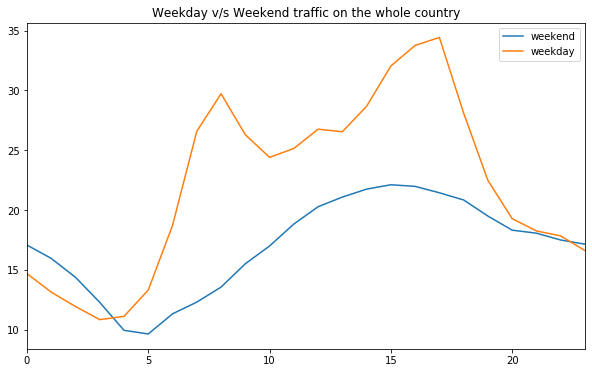

In [118]:
whole['weekend'] = train[train['Weekend'] == 1].groupby('Hour').TotalTimeStopped_p80.mean()
whole['weekday'] = train[train['Weekend'] == 0].groupby('Hour').TotalTimeStopped_p80.mean()
whole = whole.sort_index()
whole.plot(figsize = (10,6), title = 'Weekday v/s Weekend traffic on the whole country')

In [119]:
# The peak high traffic hours
whole[whole.weekday == whole.weekday.max()].index

Int64Index([17], dtype='int64')

In [120]:
# The peak high traffic hours
whole[whole.weekend == whole.weekend.max()].index

Int64Index([15], dtype='int64')

### Feature Engineering

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842452 entries, 0 to 856386
Data columns (total 29 columns):
RowId                      842452 non-null int64
IntersectionId             842452 non-null int64
Latitude                   842452 non-null float64
Longitude                  842452 non-null float64
EntryStreetName            842452 non-null object
ExitStreetName             842452 non-null object
EntryHeading               842452 non-null object
ExitHeading                842452 non-null object
Hour                       842452 non-null int64
Weekend                    842452 non-null int64
Month                      842452 non-null int64
Path                       842452 non-null object
TotalTimeStopped_p20       842452 non-null float64
TotalTimeStopped_p40       842452 non-null float64
TotalTimeStopped_p50       842452 non-null float64
TotalTimeStopped_p60       842452 non-null float64
TotalTimeStopped_p80       842452 non-null float64
TimeFromFirstStop_p20      842452 non

#### Feature Engineering

### Add features
turn direction:
The cardinal directions can be expressed using the equation:
      θ/π
 
Where  θ  is the angle between the direction we want to encode and the north compass direction, measured clockwise.

1. This is an important feature, as shown by janlauge here : https://www.kaggle.com/janlauge/intersection-congestion-eda

2. We can fill in this code in python (e.g. based on: https://www.analytics-link.com/single-post/2018/08/21/Calculating-the-compass-direction-between-two-points-in-Python , https://rosettacode.org/wiki/Angle_difference_between_two_bearings#Python , https://gist.github.com/RobertSudwarts/acf8df23a16afdb5837f )

3. TODO: circularize / use angles

In [122]:
train.EntryHeading.unique()

array(['NW', 'SE', 'SW', 'NE', 'E', 'W', 'N', 'S'], dtype=object)

In [123]:
directions = {
    'N': 0,
    'NE': 1/4,
    'E': 1/2,
    'SE': 3/4,
    'S': 1,
    'SW': 5/4,
    'W': 3/2,
    'NW': 7/4
}

In [124]:
train['EntryHeading'] = train.EntryHeading.map(directions)
train['ExitHeading'] = train.ExitHeading.map(directions)

test['EntryHeading'] = train.EntryHeading.map(directions)
test['ExitHeading'] = train.ExitHeading.map(directions)

In [125]:
train['diff_heading'] = train['EntryHeading'] - train['ExitHeading']
train['diff_heading'] = train['diff_heading'].drop_duplicates()

test['diff_heading'] = test['EntryHeading'] - test['ExitHeading']
test['diff_heading'] = test['diff_heading'].drop_duplicates()

In [126]:
train.head(10)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,total_time,diff_heading
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,1.75,1.75,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,0.0
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,0.75,0.75,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,NaN
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,1.75,1.75,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,NaN
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,0.75,0.75,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,NaN
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,1.75,1.75,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,NaN
5,1921362,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,0.75,0.75,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,NaN
6,1921363,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,1.75,1.75,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,NaN
7,1921364,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,0.75,0.75,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,NaN
8,1921365,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,1.75,1.75,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,NaN
9,1921366,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,0.75,0.75,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,NaN


In [127]:
#### Entering and exiting in the same street

train['same_street'] = (train['EntryStreetName'] == train['ExitStreetName']).astype('int64')
test['same_street'] =  (test['EntryStreetName'] == test['ExitStreetName']).astype('int64')

### Since IntersectionId ims not unique we will make or create the unique ones by combining the cities column

###  Skip OHE intersections for now - memory issues
Intersection IDs aren't unique etween cities - so we'll make new ones

Running fit on just train reveals that the test data has a "novel" city + intersection! ( '3Atlanta'!) (We will fix this)

Means we need to be careful when OHEing the data
There are 2,796 intersections, more if we count unique by city (~4K) = many, many columns. gave me memory issues when doing one hot encoding
Could try count or target mean encoding.
For now - ordinal encoding

In [128]:
train['Intersection'] = train['IntersectionId'].astype('str') + train.City

In [129]:
test['Intersection'] = test['IntersectionId'].astype('str')+train.City

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [138]:
data= (pd.concat([train["Intersection"],test["Intersection"]],axis=0).drop_duplicates())

In [141]:
data = data.astype('str')

In [145]:
le.fit(data)

LabelEncoder()

In [154]:
le.fit_transform(train['Intersection'].drop_duplicates())

array([   0, 1956, 2912, ..., 1938, 1940, 1944], dtype=int64)

In [159]:
train.dropna()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,total_time,diff_heading,same_street,Intersection
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,1.75,1.75,0,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,0.00,1,0
654,1922011,1,33.750940,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,1.25,0.75,6,0,...,0.0,0.0,0.0,23.5,45.3,Atlanta,67.0,0.50,0,2131
759,1922116,1,33.750940,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,0.25,0.75,8,0,...,0.0,42.2,48.3,48.7,76.0,Atlanta,86.0,-0.50,0,2131
1017,1922374,2,33.740143,-84.313890,Glenwood Avenue Southeast,East Lake Boulevard Southeast,0.50,1.75,0,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,-1.25,0,3176
1022,1922379,2,33.740143,-84.313890,Glenwood Avenue Southeast,Bernice Street,0.50,0.75,6,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,-0.25,0,3176
1037,1922394,2,33.740143,-84.313890,Bernice Street,Glenwood Avenue Southeast,0.00,1.50,14,0,...,55.2,66.4,66.4,81.7,198.9,Atlanta,144.0,-1.50,0,3176
1234,1922591,2,33.740143,-84.313890,Glenwood Avenue Southeast,Bernice Street,1.50,0.75,12,0,...,0.0,0.0,0.0,0.0,47.6,Atlanta,18.0,0.75,0,3176
1399,1922756,4,33.817665,-84.366965,Garson Drive,Piedmont Road Northeast,1.25,1.00,10,0,...,0.0,73.3,80.6,81.5,89.5,Atlanta,200.0,0.25,0,3963
2008,1923365,4,33.817665,-84.366965,Piedmont Road Northeast,Piedmont Road Northeast,0.00,1.00,1,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,-1.00,1,3963
3840,1925197,7,33.821440,-84.367463,Lindbergh Drive,Piedmont Road Northeast,1.50,0.00,2,0,...,0.0,0.0,0.0,43.0,102.6,Atlanta,64.0,1.50,0,4858


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [86]:
train['Intersection'] = le.fit_transform(train['Intersection'])

In [80]:
y1 = train['TotalTimeStopped_p20']
y2 = train['TotalTimeStopped_p50']
y3 = train['TotalTimeStopped_p80']
y4 = train['DistanceToFirstStop_p20']
y5 = train['DistanceToFirstStop_p50']
y6 = train['DistanceToFirstStop_p80']

### Modeling

In [37]:
#### Linear Regreesion 
from sklearn.linear_model import LinearRegression

In [40]:
X.isna().sum()

IntersectionId    1068064
Hour              1068064
Weekend           1068064
Month             1068064
en_E              1068064
en_N              1068064
en_NE             1068064
en_NW             1068064
en_S              1068064
en_SE             1068064
en_SW             1068064
en_W              1068064
ex_E                22382
ex_N                22382
ex_NE               22382
ex_NW               22382
ex_S                22382
ex_SE               22382
ex_SW               22382
ex_W                22382
dtype: int64

In [38]:
le = LinearRegression()

In [39]:
from catboost import CatBoostRegressor
cb_model_1 = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model_1.fit(X, y1)
pred_1=cb_model_1.predict(testX)

ModuleNotFoundError: No module named 'catboost'